Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Series: y 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1     mean
      0.8776  -0.0259
s.e.  0.0300   0.1028

sigma^2 estimated as 0.908:  log likelihood=-410.94
AIC=827.88   AICc=827.96   BIC=838.99

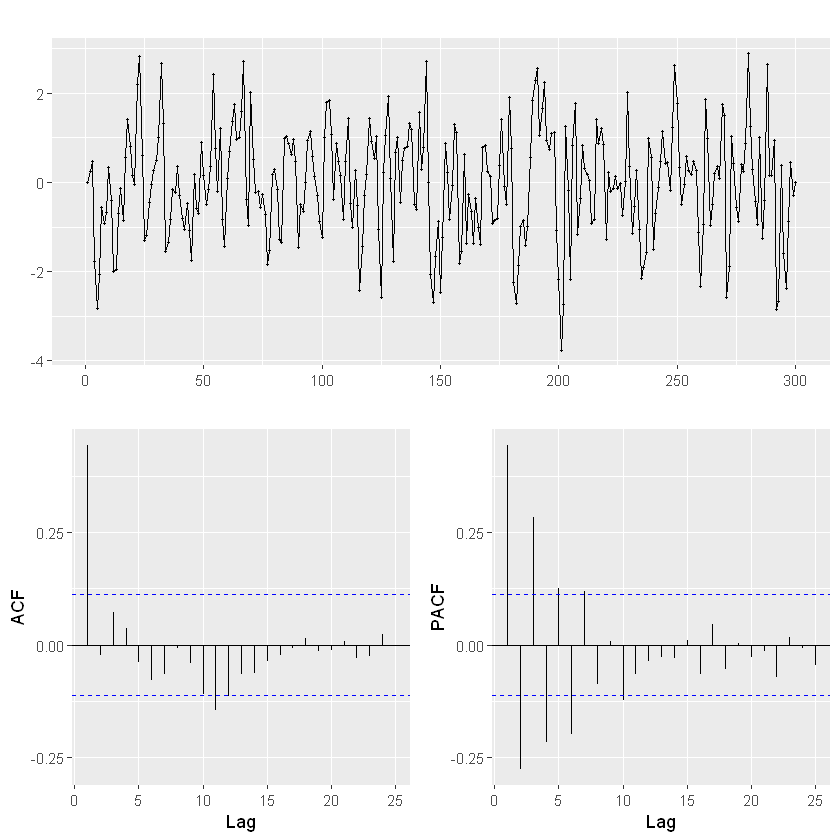

In [1]:
library(forecast)

set.seed(12)

y <- ts(numeric(300))
e <- rnorm(300)

# 계수값을 0.9, 0.6, -0.8, -0.5 차례로 대입해서 MA(1)시계열 생성
for (t in 2:300){
    y[t] <- 0.9 * e[t-1] + e[t]
}

# ACF, PACF 확인하기
ggtsdisplay(y)

# 계수(모수) 추정값 확인하기
Arima(y, order=c(0,0,1)) 

In [2]:
AR_1 <-arima.sim(list(order = c(1,0,0), ar=0.7), n = 300)
AR_2 <-arima.sim(list(order = c(2,0,0), ar=c(0.3, 0.2)), n = 300)

MA_1 <-arima.sim(list(order = c(0,0,1), ma = 0.8), n = 300)
MA_2 <-arima.sim(list(order = c(0,0,2), ma = c(0.8, 0.3)), n = 300)

Series: MA_1 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1     mean
      0.8761  -0.0389
s.e.  0.0308   0.1030

sigma^2 estimated as 0.9133:  log likelihood=-411.8
AIC=829.61   AICc=829.69   BIC=840.72

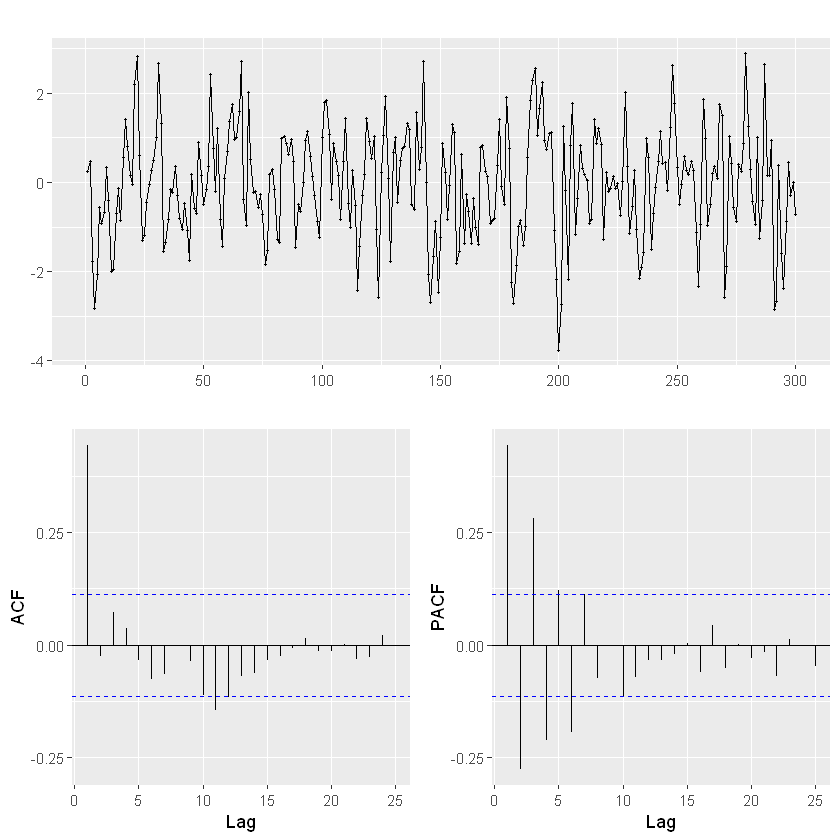

In [3]:
set.seed(12)
MA_1 <-arima.sim(list(order = c(0,0,1), ma = 0.9), n = 300)   #데이터생성

Arima(MA_1, order=c(0,0,1))

ggtsdisplay(MA_1)

Series: MA_1 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1     mean
      0.5568  -0.0290
s.e.  0.0514   0.0852

sigma^2 estimated as 0.9063:  log likelihood=-410.11
AIC=826.22   AICc=826.3   BIC=837.33

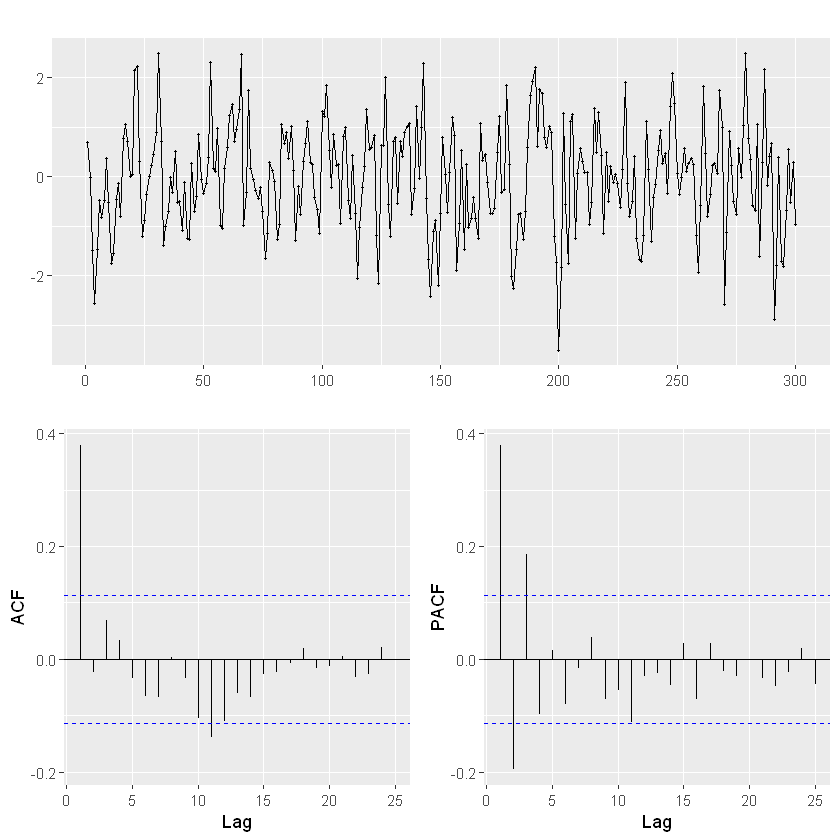

In [4]:
set.seed(12)
MA_1 <-arima.sim(list(order = c(0,0,1), ma = 0.6), n = 300)   #데이터생성

Arima(MA_1, order=c(0,0,1))

ggtsdisplay(MA_1)

Series: MA_1 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1     mean
      -0.8795  -0.0002
s.e.   0.0385   0.0068

sigma^2 estimated as 0.9062:  log likelihood=-410.64
AIC=827.28   AICc=827.36   BIC=838.39

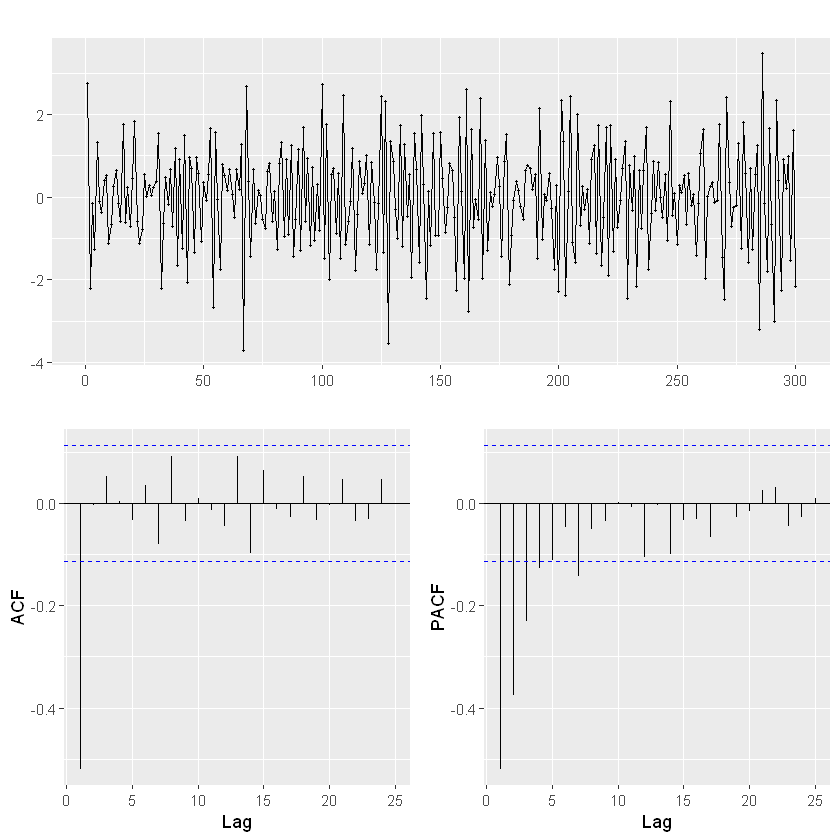

In [5]:
set.seed(12)
MA_1 <-arima.sim(list(order = c(0,0,1), ma = -0.8), n = 300)   #데이터생성

Arima(MA_1, order=c(0,0,1))

ggtsdisplay(MA_1)

Series: MA_1 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1     mean
      -0.5599  -0.0078
s.e.   0.0463   0.0244

sigma^2 estimated as 0.9169:  log likelihood=-411.85
AIC=829.7   AICc=829.78   BIC=840.81

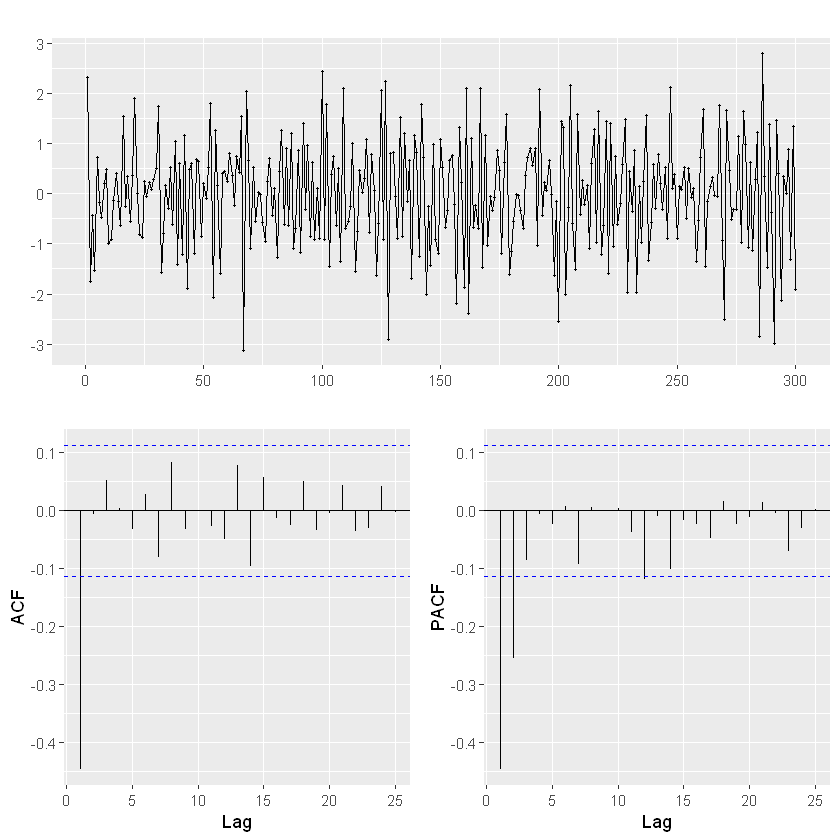

In [6]:
set.seed(12)
MA_1 <-arima.sim(list(order = c(0,0,1), ma = -0.5), n = 300)   #데이터생성

Arima(MA_1, order=c(0,0,1))

ggtsdisplay(MA_1)

In [7]:
# 여기부턴 MA(2)

Series: MA_2 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
         ma1     ma2     mean
      0.7203  0.2157  -0.0482
s.e.  0.0573  0.0544   0.1057

sigma^2 estimated as 0.9069:  log likelihood=-409.78
AIC=827.56   AICc=827.7   BIC=842.38

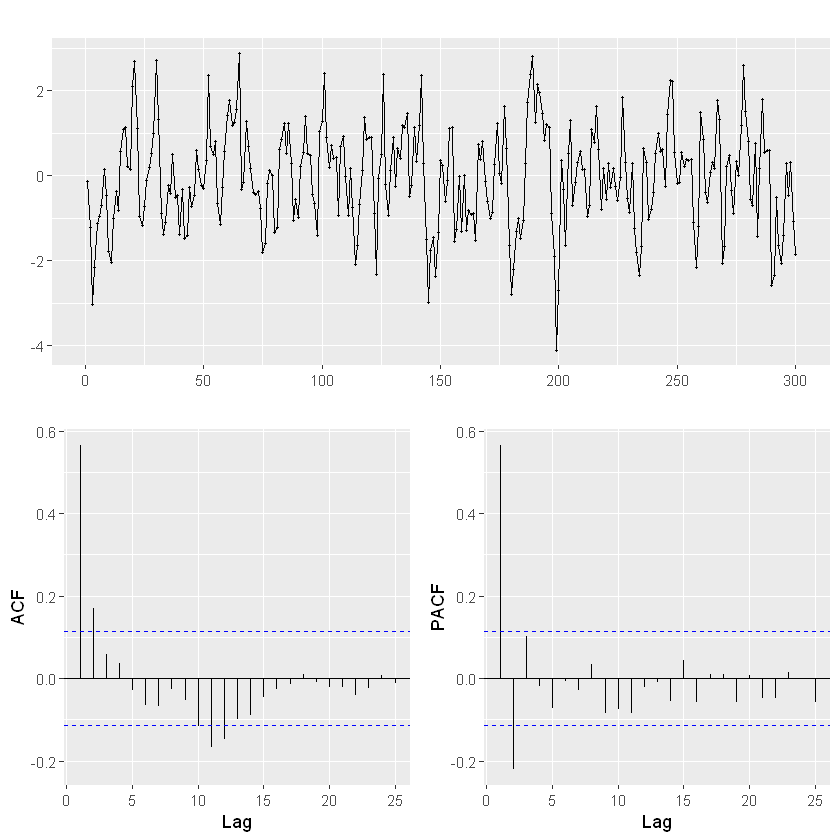

In [8]:
set.seed(12)
MA_2 <-arima.sim(list(order = c(0,0,2), ma = c(0.8,0.3)), n = 300)   #데이터생성

Arima(MA_2, order=c(0,0,2))

ggtsdisplay(MA_2)

correlogram에서 배운대로라면 ACF에서 두개가 튀도록 나와야하는건데 안그렇죠. 그렇게 샘플링이 된거라 어쩔 수가 없어요.

그래서 MA(1)하고 MA(2)로도 해볼 필요가 있습니다.